#  Medical Cost Prediction

This notebook aims to predict individual medical insurance costs using regression models.

---
## ✅ Project Steps

1. **Data Loading & Overview**  
   - Read the dataset  
   - Check column types, missing values, and basic statistics  

2. **Data Preprocessing**  
   - Encode categorical variables  
   - Check for outliers and apply scaling if needed  

3. **Exploratory Data Analysis (EDA)**  
   - Understand relationships between variables  
   - Visualize impact of age, BMI, and smoking on charges  

4. **Model Building**  
   - Try different regression models:  
     - Linear Regression  
     - Ridge, Lasso  
     - Decision Tree, Random Forest  
     - Gradient Boosting  

5. **Model Evaluation**  
   - Use MAE, RMSE, and R² score  
   - Analyze residuals and performance comparison  

6. **Conclusions & Insights**  
   - Identify key factors affecting medical cost  
   - Summarize be model and suggestions  

---

📌 Dataset Source: [Kaggle - Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)


### Import Libraries

In [90]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## 1. **Data Loading & Overview**


In [5]:
df = pd.read_csv("D:/new start/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


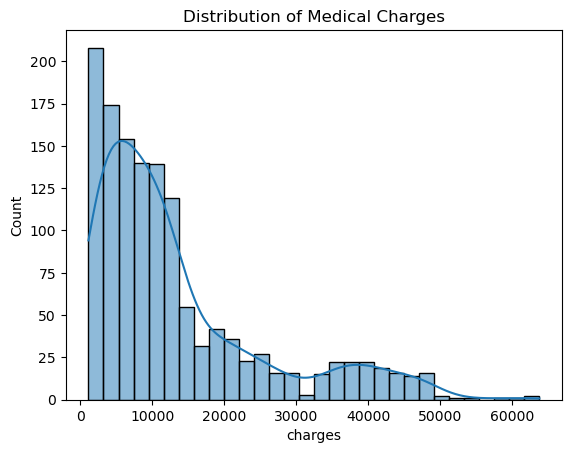

In [11]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

In [12]:
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()

### Data Overview Summary

- The dataset contains `1338` rows and `7` columns.
- No missing values found in the dataset.
- Categorical columns include `sex`, `smoker`, and `region`.
- The target variable `charges` shows a right-skewed distribution, indicating presence of high-cost outliers.
- Found and removed duplicated rows to ensure data quality.



# 2. **Data Preprocessing**  

### Encoding Categorical Variables

In [17]:
# Label Encoding for sex and smoker
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker']) # yes=1, no=0

# One-Hot Encoding fot region
df = pd.get_dummies( df, columns=['region'], drop_first=True) # drop_first=True to avoid dummy trap

### Detect Outliers

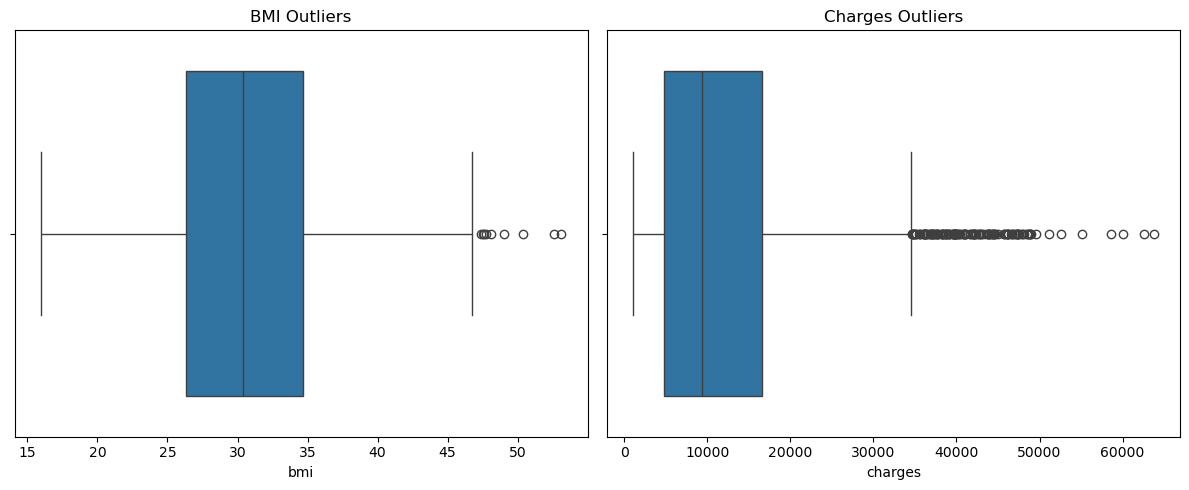

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['bmi'])
plt.title('BMI Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['charges'])
plt.title('Charges Outliers')

plt.tight_layout()
plt.show()

###  Preprocessing Summary

- Categorical variables encoded:
  - `sex` and `smoker`: Label Encoding
  - `region`: One-Hot Encoding (with 3 dummy variables)

- Detected outliers in `bmi` and `charges` using boxplots.
  - Outliers in `charges` reflect real high medical costs and were retained.
- Although some BMI values appear as outliers, they were retained as they likely represent real individuals with obesity or related health conditions, which may directly influence medical charges.




# 3. **Exploratory Data Analysis (EDA)**

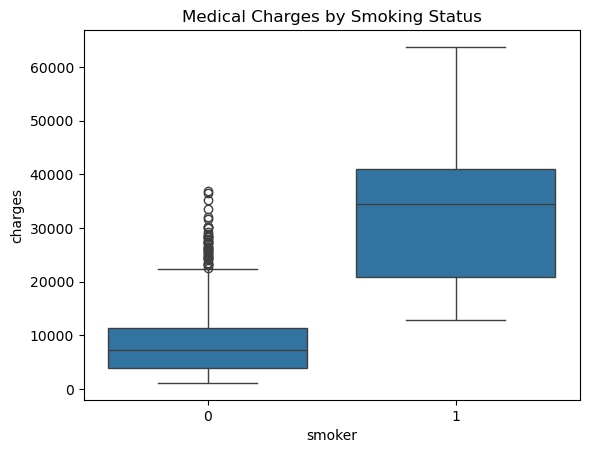

In [22]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoking Status')
plt.show()

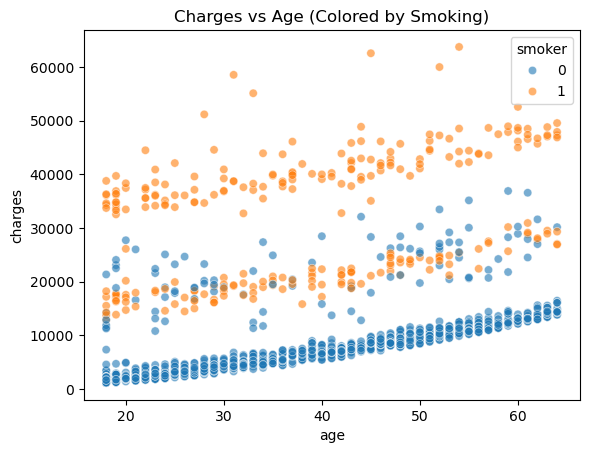

In [23]:
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', alpha=0.6)
plt.title('Charges vs Age (Colored by Smoking)')
plt.show()

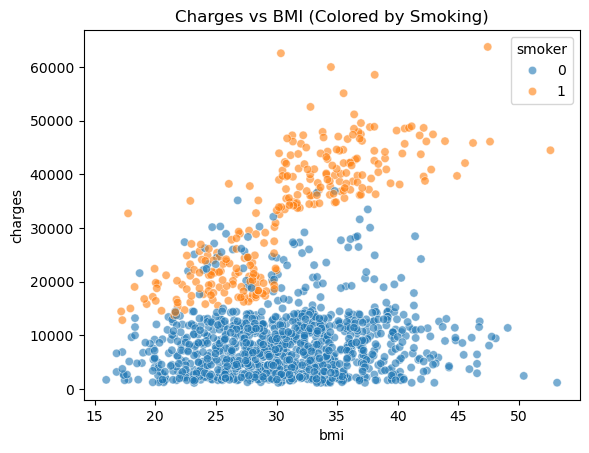

In [24]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', alpha=0.6)
plt.title('Charges vs BMI (Colored by Smoking)')
plt.show()

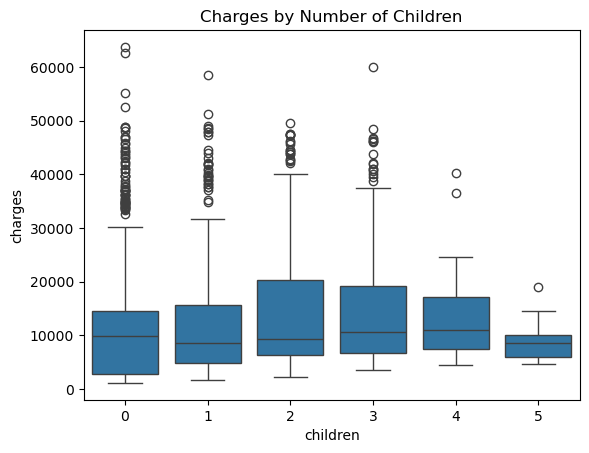

In [25]:
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')
plt.show()

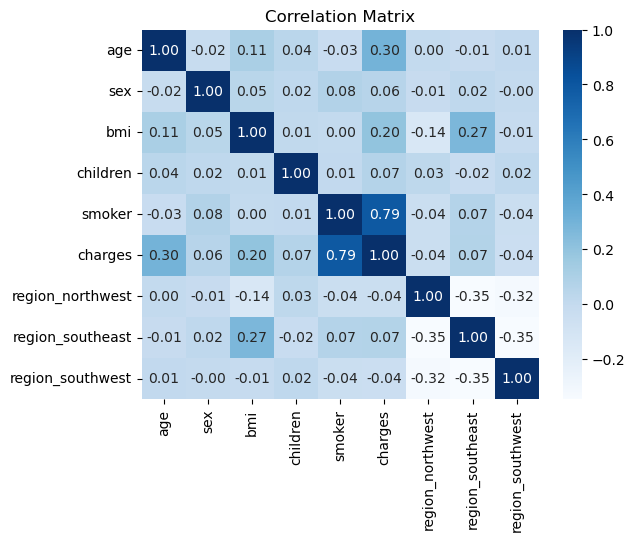

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

###  EDA Summary

- **Smoking** has a significant impact on medical charges; smokers pay much higher.
- **Age** is positively correlated with charges; older individuals tend to incur more costs.
- **BMI** shows a moderate correlation, especially for smokers with high BMI.
- **Number of children** does not significantly affect charges.
- The correlation matrix confirms that `smoker`, `age`, and `bmi` are key drivers.



# 4. **Model Building**

### Linear Regression

In [30]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Model Building
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4177.05
RMSE: 5956.34
R² Score: 0.81


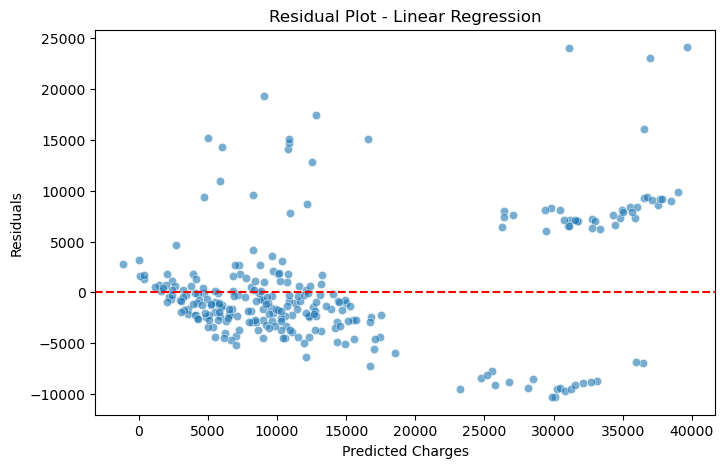

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.show()

###  Linear Regression Results

- **MAE**: 4177.05  
- **RMSE**: 5956.34  
- **R² Score**: 0.81
- **Residual Analysis** :
- The residuals appear roughly centered around 0 for low to mid-range predictions, indicating good fi 
- However, for high predicted charges, residuals increase and show a clear pattern (heteroscedasticity), suggesting the linear model struggles to capture high-cost cas 
- This may indicate the need for non-linear models or feature transformations.

 The Linear Regression model performs well, explaining **81%** of the variance in medical charges.  
 The average prediction error is about **$4177**, which is acceptable given the wide range of charges.  
 Further improvement may be possible with more advanced models like **Random Forest** or **Gradient Boosting**.


### Random Forest Regression

In [35]:
# Model Building
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predicting
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

MAE: 2636.40
RMSE: 4700.55
R² Score: 0.88


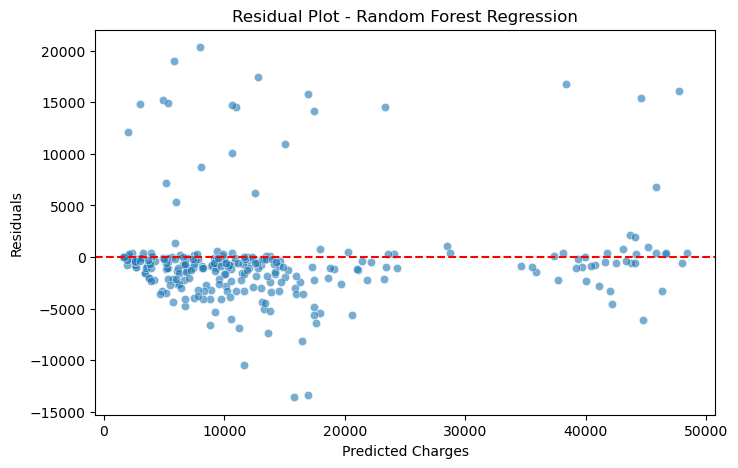

In [58]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest Regression')
plt.show()

###  Random Forest Regression Results

- **MAE**: 2636.40  
- **RMSE**: 4700.55  
- **R² Score**: 0.88

 Random Forest significantly outperformed the Linear Regression model.  
 The average error decreased by over $1500, and the model explains **88%** of the variance in medical charges.  
 This suggests that medical costs are influenced by complex, non-linear interactions that Random Forest can capture effectively.
- **Residual Analysis** : The residuals are mostly centered around zero, indicating accurate predictions. Errors are more evenly distributed compared to the linear model, with no clear pattern of bias. Some large residuals appear in the lower predicted range, likely due to underrepresented or outlier cases. Overall, the model generalizes well and handles both low and high charge predictions effectively.


## Model Tuning with RandomizedSearchCV

In [67]:
# param grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Building Model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best Model
best_rf = random_search.best_estimator_

# Evaluation
y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Best Parameters:", random_search.best_params_)
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R² Score: {r2_best:.2f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
MAE: 2413.17
RMSE: 4231.91
R² Score: 0.90


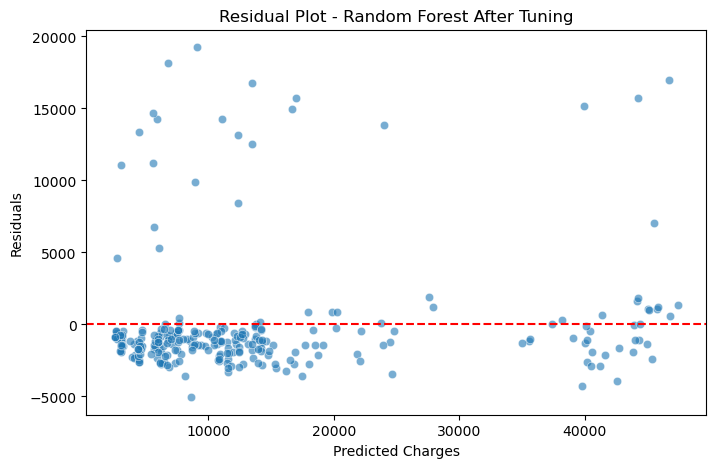

In [77]:
residuals_rft = y_test - y_pred_best

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_best, y=residuals_rft, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest After Tuning')
plt.show()

## Hyperparameter Tuning – Random Forest

After tuning the model using `RandomizedSearchCV`, the following hyperparameters were selected:

- `n_estimators`: 500
- `max_depth`: 5
- `min_samples_split`: 2
- `min_samples_leaf`: 2
- `max_features`: None

 **Model Performance (Tuned):**
- **MAE**: 2413.17  
- **RMSE**: 4231.91  
- **R² Score**: 0.90
- **Residual Plot** : Most residuals are centered around 0, indicating accurate predictions. The spread of residuals is relatively balanced, with fewer extreme errors. No clear pattern is visible, suggesting the model generalizes well and does not underfit or overfit.

✅ The tuned Random Forest model demonstrates reliable and stable predictions across the full range of medical charges.


✅ The tuned model significantly improved performance:
- Lower prediction errors
- Better generalization
- Explains 90% of the variance in medical cost


## Gradient Boosting Regressor (GBR)

In [73]:
# Model Training
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predicting
y_pred_gbr = gbr.predict(X_test)

# Evaluation
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"MAE: {mae_gbr:.2f}")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.2f}")


MAE: 2517.47
RMSE: 4268.28
R² Score: 0.90


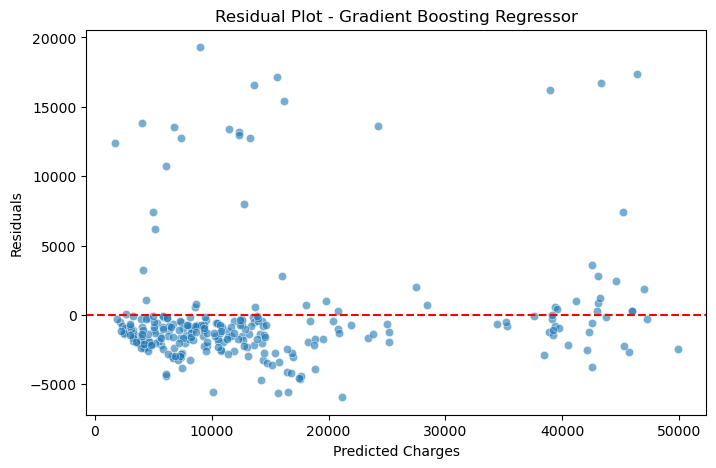

In [81]:
residuals_gbr = y_test - y_pred_gbr

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_gbr, y=residuals_gbr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - Gradient Boosting Regressor')
plt.show()


###  Gradient Boosting Regressor (GBR)

After training a Gradient Boosting Regressor, the model showed strong performance in predicting medical insurance charges.

####  Model Performance:
- **MAE**: 2517.47
- **RMSE**: 4268.28
- **R² Score**: 0.90
- **Residual Analysis** : Residuals are mostly centered around zero, indicating accurate predictions. The spread of residuals is balanced with a few larger errors in the lower prediction range. No clear pattern or funnel shape was observed, which means the model generalizes well without signs of underfitting or overfitting.

📌 Overall, the Gradient Boosting model performed almost as well as the tuned Random Forest model and confirmed the effectiveness of tree-based algorithms for this regression problem.


##  XGBoost Regressor

In [92]:
# Initialize the model
xgb = XGBRegressor(random_state=42)

# Train the model on training data
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

MAE: 2921.09
RMSE: 4978.22
R² Score: 0.87


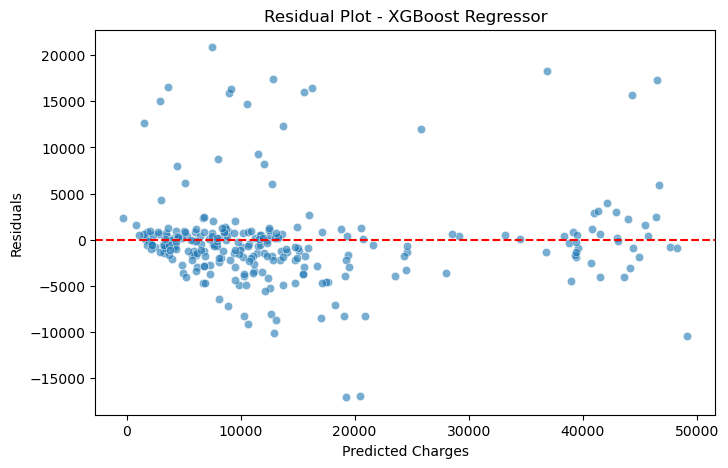

In [94]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - XGBoost Regressor')
plt.show()

### XGBoost Regressor

The XGBoost model was trained to predict medical insurance charges. Although XGBoost is often a strong performer in many datasets, in this case, its performance was slightly below that of the tuned Random Forest and Gradient Boosting models.

#### Model Performance:
- **MAE**: 2921.09
- **RMSE**: 4978.22
- **R² Score**: 0.87
- **Residual Analysis**: The residuals are centered around zero with a fairly balanced distribution. A wider spread of residuals was observed compared to the other models, especially in lower predicted values. No clear pattern in the residuals suggests the model generalizes reasonably well, but with slightly higher error.

⚠️ While XGBoost is a powerful algorithm, it did not outperform the tuned Random Forest or Gradient Boosting in this specific dataset. It remains a valuable benchmark for ensemble learning performance.


## Hyperparameter Tuning – XGBoost


In [102]:
# Define the model
xgb = XGBRegressor(random_state=42)

# Define hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit to training data
xgb_random.fit(X_train, y_train)

# Predict on test data
y_pred_xgb_tuned = xgb_random.predict(X_test)

# Evaluate performance
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Print results
print("Best Parameters:", xgb_random.best_params_)
print(f"MAE: {mae_xgb_tuned:.2f}")
print(f"RMSE: {rmse_xgb_tuned:.2f}")
print(f"R² Score: {r2_xgb_tuned:.2f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
MAE: 2530.86
RMSE: 4322.45
R² Score: 0.90


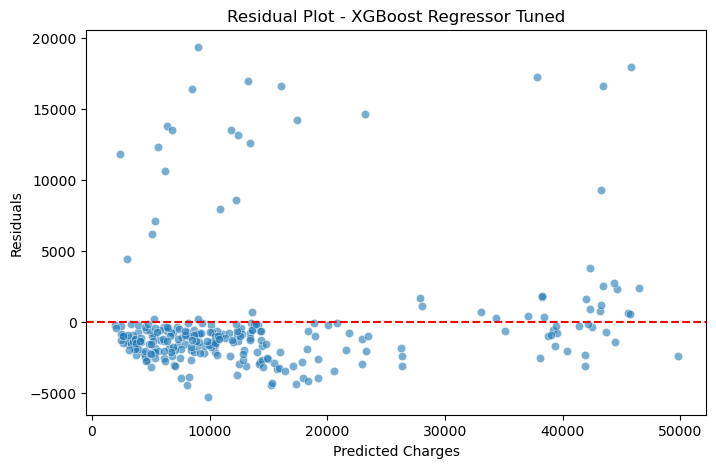

In [104]:
residuals_xgb_tuned = y_test - y_pred_xgb_tuned

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_xgb_tuned, y=residuals_xgb_tuned, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot - XGBoost Regressor Tuned')
plt.show()

### Tuned XGBoost Regressor

After applying hyperparameter tuning to the XGBoost model using RandomizedSearchCV, the model's performance significantly improved and matched the top-performing models in this project.

### Model Performance:
- **MAE**: 2530.86
- **RMSE**: 4322.45
- **R² Score**: 0.90
- **Residual Analysis** : The residual distribution remained stable and centered around zero. Residual spread is similar to other tuned tree-based models. No clear patterns or bias observed, indicating good generalization ability.

✅ With tuning, the XGBoost model became a strong competitor to Random Forest and Gradient Boosting, proving the impact of fine-tuning hyperparameters in complex ensemble models.

# Comparing Models

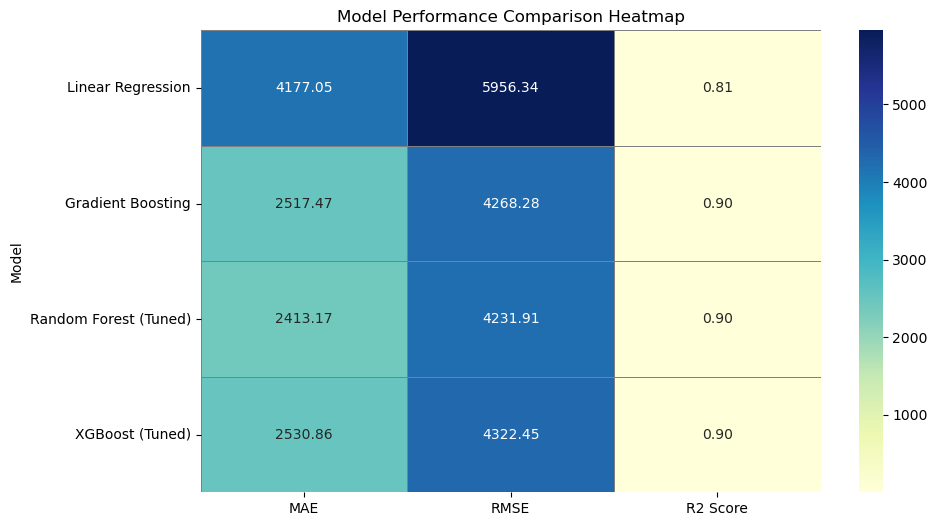

In [113]:
# Model performance results
results_matrix = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Gradient Boosting',
        'Random Forest (Tuned)',
        'XGBoost (Tuned)'
    ],
    'MAE': [4177.05, 2517.47, 2413.17, 2530.86],
    'RMSE': [5956.34, 4268.28, 4231.91, 4322.45],
    'R2 Score': [0.81, 0.90, 0.90, 0.90]
})

# Set the model names as index
results_matrix.set_index('Model', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title('Model Performance Comparison Heatmap')
plt.yticks(rotation=0)
plt.show()


## Final Model Comparison & Conclusion

After training multiple regression models on the medical insurance dataset, their performance was compared using three evaluation metrics: MAE, RMSE, and R² Score.

| Model                     | MAE     | RMSE    | R² Score |
|---------------------------|---------|---------|----------|
| Linear Regression         | 4177.05 | 5956.34 | 0.81     |
| Gradient Boosting         | 2517.47 | 4268.28 | 0.90     |
| Random Forest (Tuned)     | 2413.17 | 4231.91 | 0.90     |
| XGBoost (Tuned)           | 2530.86 | 4322.45 | 0.90  |

### 📊 Key Insights:
- All three ensemble models (**Gradient Boosting**, **Random Forest**, and **XGBoost**) significantly outperformed **Linear Regression**.
- Even without hyperparameter tuning, **Gradient Boosting** achieved high accuracy.
- **Random Forest (Tuned)** had the lowest MAE and RMSE, making it the most accurate model in this project.
- All ensemble models achieved **R² = 0.90**, explaining 90% of the variance in charges.

### ✅ Final Conclusion:
Ensemble learning techniques, especially with proper tuning, provide strong performance for regression tasks like predicting medical costs. In this project, **Random Forest (Tuned)** was the best-performing model, but both **Gradient Boosting** and **XGBoost** also showed excellent results.

This project illustrates the value of:
- Trying multiple algorithms
- Tuning hyperparameters
- Evaluating model data science portfolio.
